In [1]:
import numpy as np
from py_vlasov.dispersion_tensor import dt_wrapper, f_d, f_chi
from py_vlasov.follow_parameter import change_angle, change_beta, change_k, change_tetp
from py_vlasov.transport_ratios import input_gen, transport_ratios
import py_vlasov.util as util
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=2)

###### Test change_angle function

In [9]:
"""
We use Alfven wave as an example
"""
k = 0.1
theta = 85
beta = 0.2
tetp = 1
method = 'numpy'
mratio = 1836
n = 10
aol = 1/5000
"-------------------"
target_angle = 86
freq = 1.95444741e-02 -6.32084029e-06j
param = (k, theta, beta, tetp, method, mratio, n, aol)
num = 10
show_plot = True
def follow_angle_fn(prev_freq, prev_angle, cur_angle):
    cos_prev = np.cos(prev_angle * np.pi/180)
    cos_cur = np.cos(cur_angle * np.pi/180)
    return prev_freq * cos_cur/cos_prev

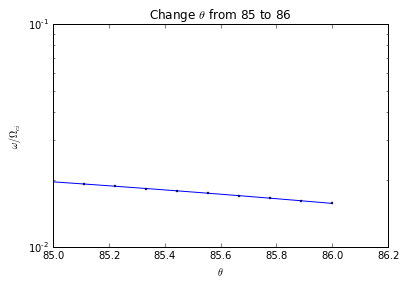

(0.015643787987544327-5.063447033874434e-06j)

In [10]:
change_angle(freq, param, target_angle, num, follow_angle_fn, show_plot=True)

###### Test change_beta function

In [11]:
"""
We use Alfven wave as an example, again
"""
k = 0.1
theta = 85
beta = 0.2
tetp = 1
method = 'numpy'
mratio = 1836
n = 10
aol = 1/5000
"-------------------"
target_beta = 1.5
freq = 1.95444741e-02 -6.32084029e-06j
param = (k, theta, beta, tetp, method, mratio, n, aol)
num = 20

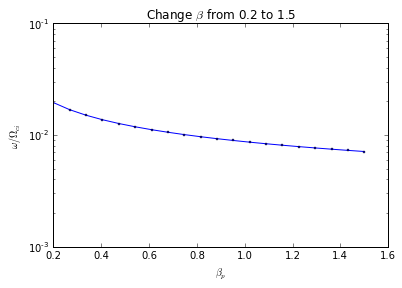

(0.0071204757077697944-4.8992828968332412e-06j)

In [12]:
change_beta(freq, param, target_beta, num, show_plot=True)

###### Test change_k function

In [13]:
"""
We use Alfven wave as an example, again
"""
k = 0.1
theta = 85
beta = 0.2
tetp = 1
method = 'pade'#'numpy'
mratio = 1836
n = 10
aol = 1/5000
"-------------------"
target_k = 10
freq = 1.95444741e-02 -6.32084029e-06j
param = (k, theta, beta, tetp, method, mratio, n, aol)
num = 100

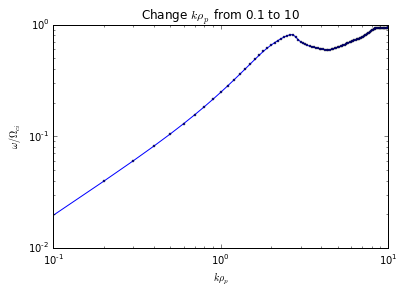

(0.941905048343324-2.206922048581577j)

In [14]:
change_k(freq, param, target_k, num, step_method='linear')

###### Test change_tetp function

In [15]:
"""
We use Alfven wave as an example, again
"""
k = 0.1
theta = 85
beta = 0.2
tetp = 1
method = 'pade'#'numpy'
mratio = 1836
n = 10
aol = 1/5000
"-------------------"
target_tetp = 10
freq = 1.95444741e-02 -6.32084029e-06j
param = (k, theta, beta, tetp, method, mratio, n, aol)
num = 10

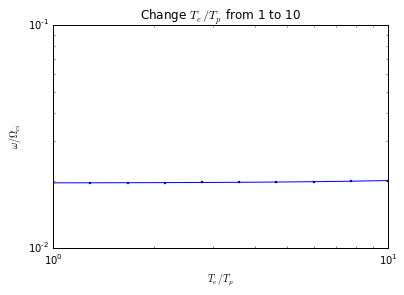

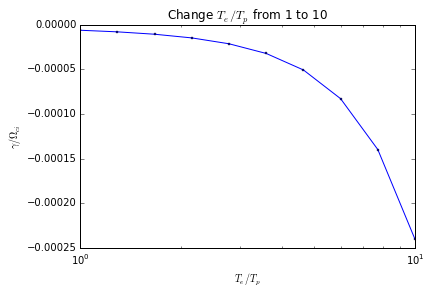

(0.020010207655508001-0.00024048692550193406j)

In [16]:
change_tetp(freq, param, target_tetp, num, step_method='log')

# quasi-parallel Alfven wave (Gary book, chp 6)

In [2]:
"""
We use Alfven wave as an example, again
"""
k = 0.1
theta = 85
beta = 0.2
tetp = 1
method = 'pade'#'numpy'
mratio = 1836
n = 10
aol = 1/5000
"-------------------"
target_angle = 1
freq = 1.95444741e-02 -6.32084029e-06j
param = (k, theta, beta, tetp, method, mratio, n, aol)
num = 20

def follow_angle_fn(prev_freq, prev_angle, cur_angle):
    cos_prev = np.cos(prev_angle * np.pi/180)
    cos_cur = np.cos(cur_angle * np.pi/180)
    return prev_freq * cos_cur/cos_prev

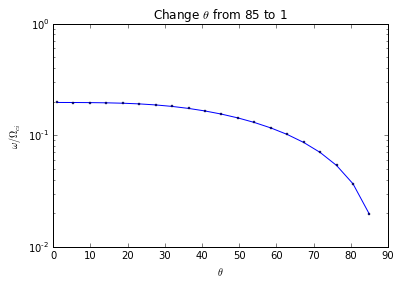

In [3]:
result = change_angle(freq, param, target_angle, num, follow_angle_fn, show_plot=True)

In [4]:
theta_rad = np.pi * target_angle/180
kperp = k * np.sin(theta_rad)
kpar = k * np.cos(theta_rad)
inp = input_gen(result, kperp, kpar, beta, tetp)
res = transport_ratios(inp, True);

eigen E = [  1.00e+00 -5.18e-05j  -0.00e+00 -1.00e+00j  -7.96e-04 +1.53e-04j]
p_e_b0 = -1+5.2e-05j
p_b_b0 = -1+5.4e-05j
p_b_k = -1-5.4e-05j
c_bb = 0.5
helicy = -1
E_L/E_tot = 0.00014
compressibility = [ 0.  0.]
parallel compressibility = [ 1.82-0.28j  1.82-0.28j]
cross helicty = [-1.    0.04]
